Read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
dataset = pd.read_csv("../Datasets/EU-SEN_dataset.csv")

# Delete unwanted features
dataset.drop(['country'], axis=1, inplace=True)

#print(dataset.head())

Pre-processing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Autoscaling
xc = StandardScaler().fit_transform(dataset)

# Dataset split (train & test)
X_train = xc[0:len(xc)-1, :] # Europe
X_test = xc[len(xc)-1:len(xc),:] # Senegal
#X_test = xc[6:7,:] # Poland
Y_test = np.ones((len(X_test),1))
# X_train, X_test = train_test_split(xc, test_size=0.1, random_state=42)

Autoencoder

In [3]:
np.random.seed(5)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

dim_entrada = X_train.shape[1]
capa_entrada = Input(shape=(dim_entrada,))

encoder = Dense(7, activation='tanh')(capa_entrada)
encoder = Dense(2, activation='relu')(encoder)

decoder = Dense(7, activation='tanh')(encoder)
decoder = Dense(dim_entrada, activation='relu')(decoder)

autoencoder = Model(inputs=capa_entrada, outputs=decoder)

sgd = SGD(lr=0.01) # Learning Rate
autoencoder.compile(optimizer='sgd', loss='mse')

nits = 100
tam_lote = 2
autoencoder.fit(xc, xc, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(xc,xc), verbose=1)

plot_model(autoencoder)

2022-03-06 12:14:39.601051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 12:14:39.601070: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Epoch 1/100


2022-03-06 12:14:40.606847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-06 12:14:40.607063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 12:14:40.607125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-06 12:14:40.607168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-06 12:14:40.607209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

6/6 [==============================] - 0s 16ms/step - loss: 0.9834 - val_loss: 0.9745
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9720 - val_loss: 0.9635
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.9625 - val_loss: 0.9583
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9591 - val_loss: 0.9567
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9547 - val_loss: 0.9520
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9527 - val_loss: 0.9489
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9484 - val_loss: 0.9458
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9461 - val_loss: 0.9431
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.9426 - val_loss: 0.9404
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.9410 - val_loss: 0.9384
Epoch 11/100
6/6 [======================

Validation

(1, 10)


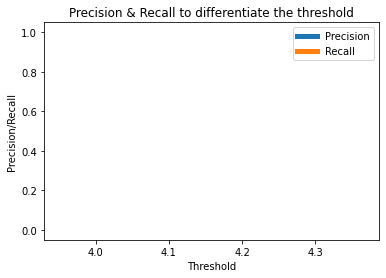

Confusion matrix:  [[1]]


In [4]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

# Prediction X_test -> Autoencoder -> X_pred
X_pred = autoencoder.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)
print(X_pred.shape)

# Precision-recall graph to determine threshold
precision, recall, threshold = precision_recall_curve(Y_test, ecm)

plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision & Recall to differentiate the threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

# Confusion matrix
fixed_threshold = 0.75
Y_pred = [1 if e > fixed_threshold else 0 for e in ecm]

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix: ", conf_matrix)